In [5]:
import tensorflow as tf

In [6]:
img_size = (128, 128)      
batch_size = 32
train_path  = 'train/'
test_path = 'test/'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split= 0.2, rotation_range=20,        
    width_shift_range=0.2,height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory( train_path, target_size=img_size, batch_size=batch_size, 
                                                    class_mode='binary', subset='training', shuffle=True)

val_generator = train_datagen.flow_from_directory( train_path, target_size=img_size, batch_size=batch_size, 
                                                  class_mode='binary', subset='validation', shuffle=True)

test_generator = test_datagen.flow_from_directory( test_path, target_size=img_size, batch_size=batch_size, 
                                                  class_mode='binary',  shuffle=False)


print(train_generator.class_indices)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense, Conv2D


In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=((128, 128, 3)), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\Farah\anaconda3\envs\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,921 (14.14 MB)

 Trainable params: 3,705,921 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 288s 568ms/step - accuracy: 0.5479 - loss: 0.7305 - val_accuracy: 0.6540 - val_loss: 0.6251
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 245s 490ms/step - accuracy: 0.6462 - loss: 0.6244 - val_accuracy: 0.6945 - val_loss: 0.5855
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 251s 501ms/step - accuracy: 0.6969 - loss: 0.5792 - val_accuracy: 0.7165 - val_loss: 0.5530
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 248s 495ms/step - accuracy: 0.7073 - loss: 0.5525 - val_accuracy: 0.7310 - val_loss: 0.5354
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 247s 494ms/step - accuracy: 0.7228 - loss: 0.5387 - val_accuracy: 0.7370 - val_loss: 0.5196
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 292s 554ms/step - accuracy: 0.7300 - loss: 0.5298 - val_accuracy: 0.7538 - val_loss: 0.4958
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 272s 543ms/step - accuracy: 0.7450 - loss: 0.5050 - val_accuracy: 0.7655 - val_loss: 0.4863
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 302s 602ms/step - accuracy: 0.7564 -

In [26]:
predictions = model.predict(test_generator)


157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 160ms/step


In [27]:
predicted_classes = (predictions > 0.5).astype(int).flatten()


In [28]:
index_to_class = {v: k for k, v in train_generator.class_indices.items()}
predicted_labels = [index_to_class[i] for i in predicted_classes]

print(predicted_labels[:10])


['cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'dogs', 'cats', 'dogs', 'cats']


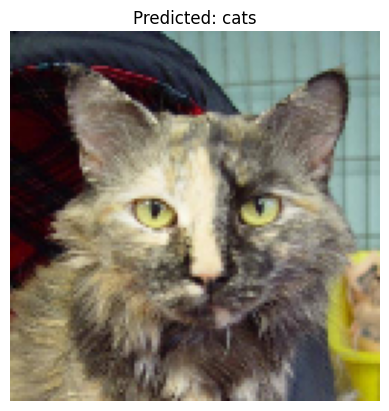

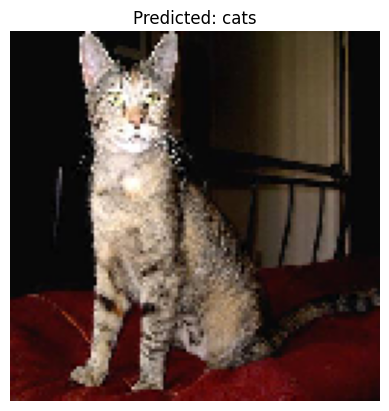

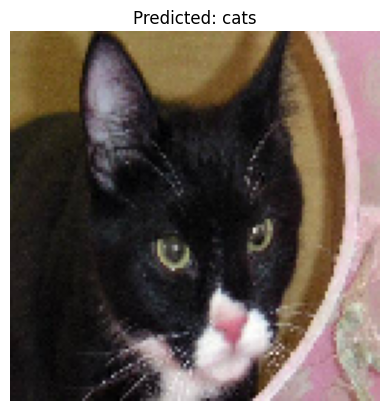

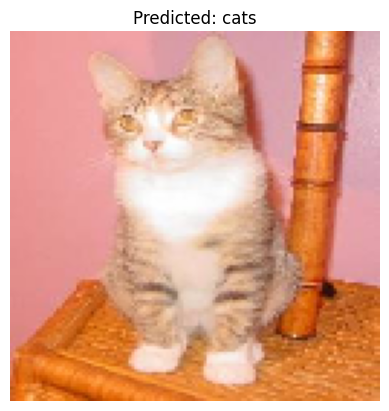

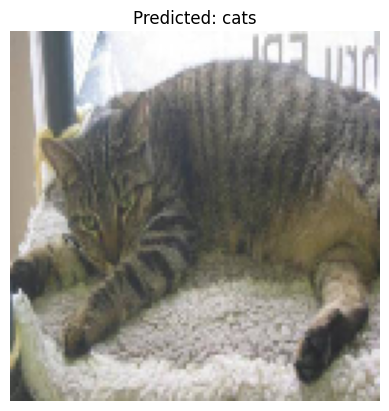

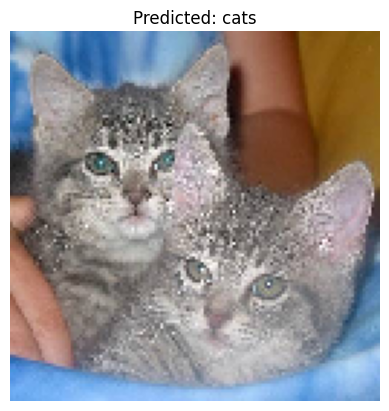

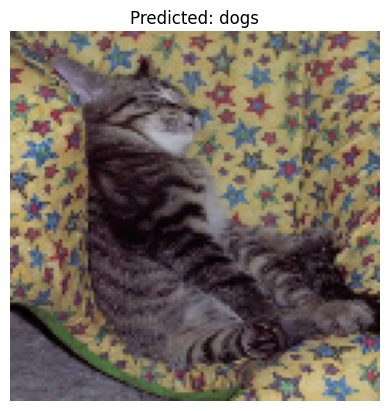

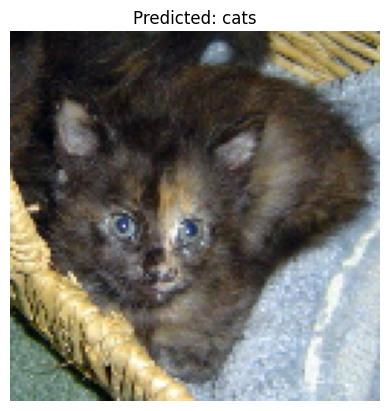

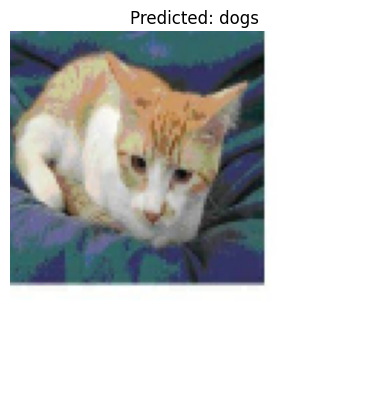

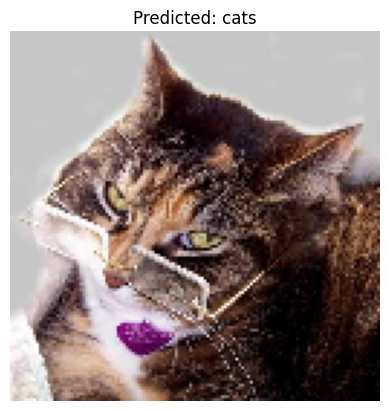

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image

test_img_paths = test_generator.filepaths 
for i in range(10):
    img_path = test_img_paths[i]
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    
    plt.imshow(img_array)
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()
